In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv

pd.set_option('display.max_columns', None)
%matplotlib inline

In [2]:
#df = pd.read_csv('partidas_2023.csv')
url='https://drive.google.com/file/d/1XXk2LO0CsNADBB1LRGOV5rUpyZdEZ8s2/view?usp=share_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)


<Axes: >

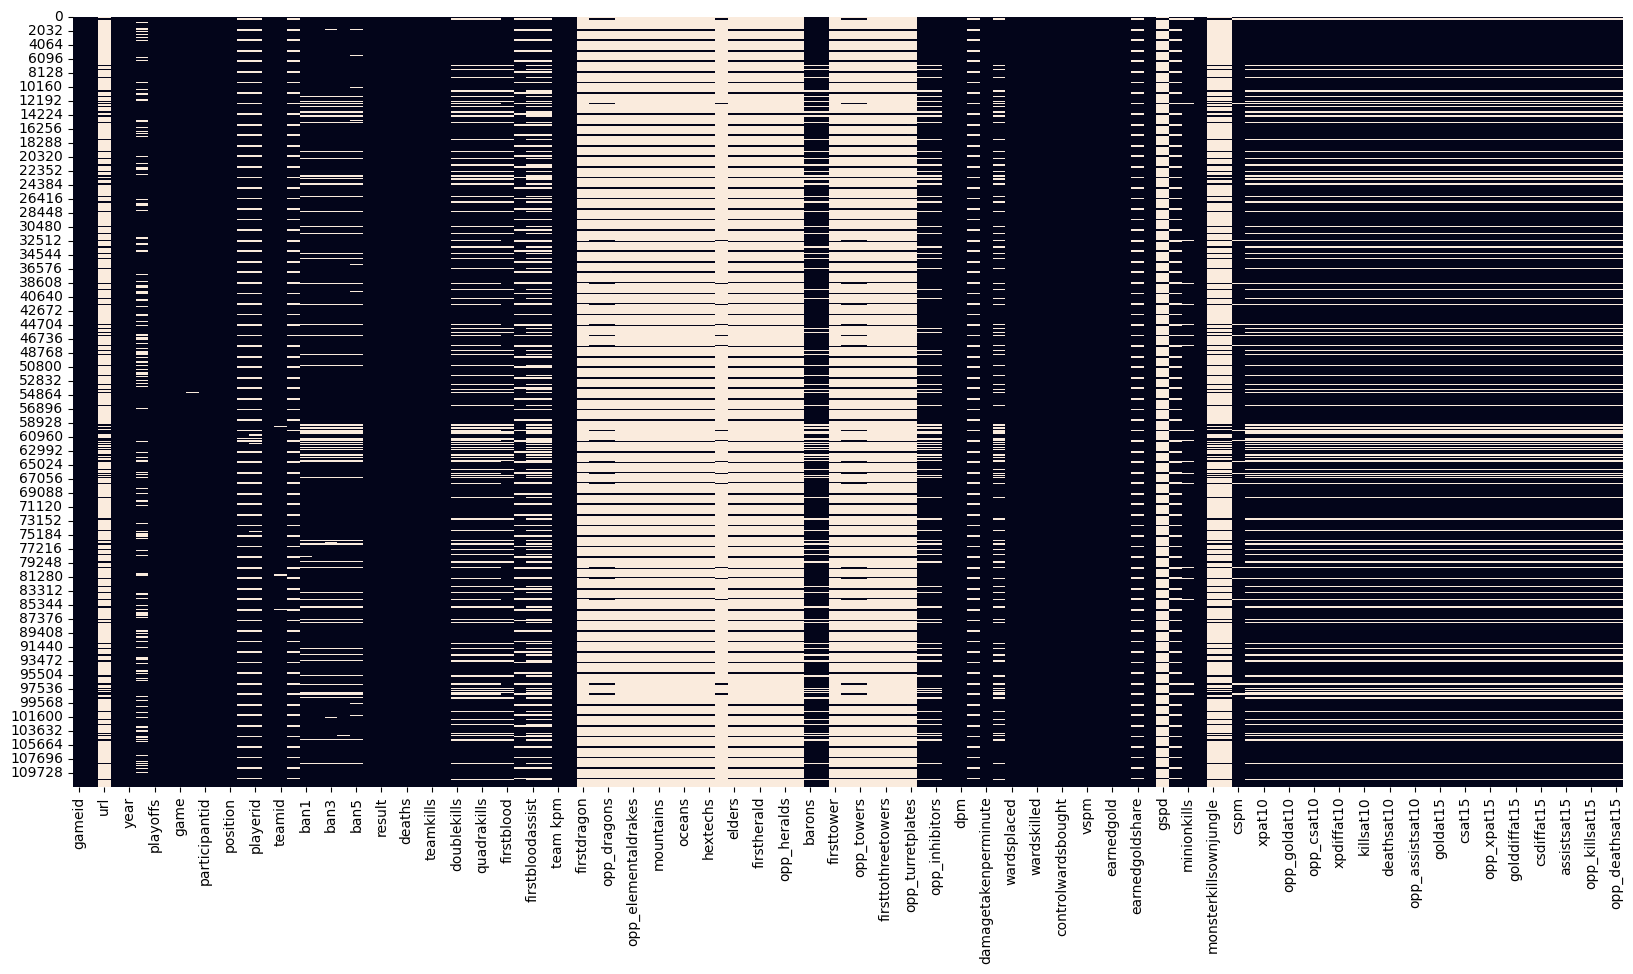

In [3]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(),cbar=False)

In [4]:
pd.set_option('display.max_columns', None)

In [27]:
df.to_csv('partidas_2023.csv', index=False)

In [28]:
df_times = df.loc[(df['position'] == 'team')]

In [32]:
df_times = df_times.dropna(axis='columns')

In [33]:
df_times.to_csv('partidas_times.csv', index=False)

In [34]:
df_jogadores = df.loc[(df['position'] != 'team')]

In [36]:
df_jogadores = df_jogadores.dropna(axis='columns')

In [37]:
df_jogadores.to_csv('partidas_jogadores.csv', index=False)

In [6]:
print(len(df))

111756


In [ ]:

GROUP_LENGTH = 5000 #Limite aproximado de linhas

writer = pd.ExcelWriter('C:\\BKP\\Estudo\\Python\\poetry\\Partidas_Lol\\teste1.xlsx') #Cria o arquivo a ser salvo
number_of_chunks = (len(df)/GROUP_LENGTH) #calcula a quantidade de abas no Excel
chunks = np.array_split(df,number_of_chunks) #quebra as quantidades 
sheet_number = 1 #Inicio do contador

for chunk in chunks: #faz a magica
    chunk.to_excel(writer,sheet_name = 'Planilha' + str(sheet_number), index=False, header=True)
    sheet_number+=1
      
writer.close()


In [7]:
df.columns

Index(['gameid', 'datacompleteness', 'url', 'league', 'year', 'split',
       'playoffs', 'date', 'game', 'patch',
       ...
       'opp_csat15', 'golddiffat15', 'xpdiffat15', 'csdiffat15', 'killsat15',
       'assistsat15', 'deathsat15', 'opp_killsat15', 'opp_assistsat15',
       'opp_deathsat15'],
      dtype='object', length=123)

In [8]:
df[['gameid', 'datacompleteness', 'url', 'league', 'year', 'split','playoffs', 'date', 'game', 'patch']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111756 entries, 0 to 111755
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   gameid            111756 non-null  object 
 1   datacompleteness  111756 non-null  object 
 2   url               19248 non-null   object 
 3   league            111756 non-null  object 
 4   year              111756 non-null  int64  
 5   split             90948 non-null   object 
 6   playoffs          111756 non-null  int64  
 7   date              111756 non-null  object 
 8   game              111756 non-null  int64  
 9   patch             111636 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 8.5+ MB


In [26]:
df[['gameid', 'datacompleteness', 'url', 'league', 'year', 'split','playoffs', 'date', 'game', 'patch']].to_csv('partidas_2023.csv', index=False)

In [9]:
df['date'] = pd.to_datetime(df['date'])

In [10]:
df.head()

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,participantid,side,position,playername,playerid,teamname,teamid,champion,ban1,ban2,ban3,ban4,ban5,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,team kpm,ckpm,firstdragon,dragons,opp_dragons,elementaldrakes,opp_elementaldrakes,infernals,mountains,clouds,oceans,chemtechs,hextechs,dragons (type unknown),elders,opp_elders,firstherald,heralds,opp_heralds,firstbaron,barons,opp_barons,firsttower,towers,opp_towers,firstmidtower,firsttothreetowers,turretplates,opp_turretplates,inhibitors,opp_inhibitors,damagetochampions,dpm,damageshare,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,earnedgoldshare,goldspent,gspd,total cs,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,opp_killsat10,opp_assistsat10,opp_deathsat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,ESPORTSTMNT06_2753012,complete,NaN,LFL2,2023,Spring,0,2023-01-10 17:07:16,1,13.01,1,Blue,top,Wylenz,oe:player:60aff1184bec1d2b2efdae84f5b6e3e,Klanik Esport,oe:team:0ade5e44c23039bca133eee58ec1b83,Jax,Sylas,Caitlyn,Wukong,Akali,Yone,2612,1,4,0,6,13,7,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2986,0.4594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,14283,328.0934,0.150027,719.5406,878.9127,20,0.4594,5,0.1149,11,49,1.1256,18855,13251,304.3874,0.295868,15955,NaN,399.0,367.0,32,NaN,NaN,9.1654,3163.0,4772.0,83.0,3087.0,4814.0,81.0,76.0,-42.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,5059.0,7946.0,143.0,4737.0,7683.0,131.0,322.0,263.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ESPORTSTMNT06_2753012,complete,NaN,LFL2,2023,Spring,0,2023-01-10 17:07:16,1,13.01,2,Blue,jng,Julbu,oe:player:fd78e127e45463dcfc2ea3836af0335,Klanik Esport,oe:team:0ade5e44c23039bca133eee58ec1b83,Poppy,Sylas,Caitlyn,Wukong,Akali,Yone,2612,1,2,2,4,13,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2986,0.4594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,6219,142.8560,0.065324,847.3047,1513.9663,18,0.4135,11,0.2527,17,61,1.4012,12082,6478,148.8055,0.144640,11675,NaN,159.0,23.0,136,NaN,NaN,3.6524,3035.0,3302.0,54.0,2948.0,3140.0,66.0,87.0,162.0,-12.0,0.0,0.0,0.0,0.0,0.0,0.0,4325.0,4637.0,74.0,4682.0,5960.0,117.0,-357.0,-1323.0,-43.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ESPORTSTMNT06_2753012,complete,NaN,LFL2,2023,Spring,0,2023-01-10 17:07:16,1,13.01,3,Blue,mid,Sintax,oe:player:baf7147fedeec5de54ca1f240952a3f,Klanik Esport,oe:team:0ade5e44c23039bca133eee58ec1b83,Taliyah,Sylas,Caitlyn,Wukong,Akali,Yone,2612,1,2,2,11,13,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2986,0.4594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,27028,620.8576,0.283899,365.3522,323.7289,23,0.5283,10,0.2297,7,49,1.1256,15722,10118,232.4196,0.225914,14525,NaN,337.0,287.0,50,NaN,NaN,7.7412,3117.0,4927.0,85.0,3455.0,5174.0,103.0,-338.0,-247.0,-18.0,0.0,0.0,0.0,0.0,0.0,0.0,4956.0,7772.0,136.0,5435.0,8096.0,162.0,-479.0,-324.0,-26.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ESPORTSTMNT06_2753012,complete,NaN,LFL2,2023,Spring,0,2023-01-10 17:07:16,1,13.01,4,Blue,bot,Axelent,oe:player:8204ca38dc1c42012b5d53131271eb1,Klanik Esport,oe:team:0ade5e44c23039bca133eee58ec1b83,Ezreal,Sylas,Caitlyn,Wukong,Akali,Yone,2612,1,5,1,7,13,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2986,0.4594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,42005,964.8928,0.441215,398.4533,234.3721,17,0.3905,6,0.1378,5,47,1.0796,17332,1172

In [11]:
type(df[['league']]) #datafram 

pandas.core.frame.DataFrame

In [12]:
type(df['league'])

pandas.core.series.Series

In [13]:
df[(df['league'] == 'LEC')] #outra forma de filtrar

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,participantid,side,position,playername,playerid,teamname,teamid,champion,ban1,ban2,ban3,ban4,ban5,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,team kpm,ckpm,firstdragon,dragons,opp_dragons,elementaldrakes,opp_elementaldrakes,infernals,mountains,clouds,oceans,chemtechs,hextechs,dragons (type unknown),elders,opp_elders,firstherald,heralds,opp_heralds,firstbaron,barons,opp_barons,firsttower,towers,opp_towers,firstmidtower,firsttothreetowers,turretplates,opp_turretplates,inhibitors,opp_inhibitors,damagetochampions,dpm,damageshare,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,earnedgoldshare,goldspent,gspd,total cs,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,opp_killsat10,opp_assistsat10,opp_deathsat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
2340,ESPORTSTMNT06_2767073,complete,NaN,LEC,2023,Winter,0,2023-01-21 17:27:32,1,13.01,1,Blue,top,Odoamne,oe:player:2b819506567c258f6fffdd4ec78ca0c,Excel Esports,oe:team:8f995652631df209ff11c4542abdcaf,K'Sante,Sylas,Ryze,Yuumi,Akali,Gwen,1826,0,5,5,2,11,18,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3614,0.9529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,14965,491.7306,0.229778,989.9014,1580.7338,7,0.2300,3,0.0986,2,14,0.4600,10574,6573,215.9803,0.227650,10200,NaN,230.0,220.0,10,NaN,NaN,7.5575,3241.0,4806.0,84.0,3126.0,4960.0,69.0,115.0,-154.0,15.0,0.0,0.0,1.0,0.0,1.0,0.0,5066.0,8170.0,130.0,4931.0,7877.0,113.0,135.0,293.0,17.0,1.0,0.0,1.0,0.0,1.0,1.0
2341,ESPORTSTMNT06_2767073,complete,NaN,LEC,2023,Winter,0,2023-01-21 17:27:32,1,13.01,2,Blue,jng,Xerxe,oe:player:ab7f28ca18446cb18274a884b1525f7,Excel Esports,oe:team:8f995652631df209ff11c4542abdcaf,Wukong,Sylas,Ryze,Yuumi,Akali,Gwen,1826,0,0,3,5,11,18,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.3614,0.9529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,5834,191.6977,0.089577,947.6451,685.5969,6,0.1972,16,0.5257,5,48,1.5772,8252,4251,139.6824,0.147234,8075,NaN,160.0,37.0,123,NaN,NaN,5.2574,2939.0,2950.0,58.0,3559.0,3539.0,62.0,-620.0,-589.0,-4.0,0.0,1.0,0.0,1.0,0.0,1.0,4406.0,4987.0,94.0,5783.0,5869.0,104.0,-1377.0,-882.0,-10.0,0.0,1.0,0.0,2.0,0.0,1.0
2342,ESPORTSTMNT06_2767073,complete,NaN,LEC,2023,Winter,0,2023-01-21 17:27:32,1,13.01,3,Blue,mid,Vetheo,oe:player:5eb466e63c91a4ccf328f21715e51ae,Excel Esports,oe:team:8f995652631df209ff11c4542abdcaf,Syndra,Sylas,Ryze,Yuumi,Akali,Gwen,1826,0,3,4,2,11,18,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.3614,0.9529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,16135,530.1752,0.247743,613.6035,355.4326,15,0.4929,3,0.0986,7,26,0.8543,11858,7857,258.1709,0.272118,11375,NaN,289.0,273.0,16,NaN,NaN,9.4962,3080.0,4154.0,78.0,3266.0,4972.0,83.0,-186.0,-818.0,-5.0,0.0,1.0,1.0,0.0,1.0,0.0,4841.0,7127.0,135.0,5188.0,8123.0,145.0,-347.0,-996.0,-10.0,0.0,1.0,1.0,0.0,1.0,0.0
2343,ESPORTSTMNT06_2767073,complete,NaN,LEC,2023,Winter,0,2023-01-21 17:27:32,1,13.01,4,Blue,bot,Patrik,oe:player:1dad889ff236635dc1e03d02312e79c,Excel Esports,oe:team:8f995652631df209ff11c4542abdcaf,Varus,Sylas,Ryze,Yuumi,Akali,Gwen,1826,0,1,4,3,11,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3614,0.9529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,17872,587.2508,0.274413,431.1720,215.1588,11,0.3614,4,0.1314,2,21,0.6900,9853,5852,192.2892

In [ ]:
df.query("league=='LEC'") #pesquisar por Query

Separar Liga


In [14]:


df_liga = df.loc[(df['league'] == 'LEC')]



In [15]:
df_liga.head()

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,participantid,side,position,playername,playerid,teamname,teamid,champion,ban1,ban2,ban3,ban4,ban5,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,team kpm,ckpm,firstdragon,dragons,opp_dragons,elementaldrakes,opp_elementaldrakes,infernals,mountains,clouds,oceans,chemtechs,hextechs,dragons (type unknown),elders,opp_elders,firstherald,heralds,opp_heralds,firstbaron,barons,opp_barons,firsttower,towers,opp_towers,firstmidtower,firsttothreetowers,turretplates,opp_turretplates,inhibitors,opp_inhibitors,damagetochampions,dpm,damageshare,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,earnedgoldshare,goldspent,gspd,total cs,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,opp_killsat10,opp_assistsat10,opp_deathsat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
2340,ESPORTSTMNT06_2767073,complete,NaN,LEC,2023,Winter,0,2023-01-21 17:27:32,1,13.01,1,Blue,top,Odoamne,oe:player:2b819506567c258f6fffdd4ec78ca0c,Excel Esports,oe:team:8f995652631df209ff11c4542abdcaf,K'Sante,Sylas,Ryze,Yuumi,Akali,Gwen,1826,0,5,5,2,11,18,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3614,0.9529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,14965,491.7306,0.229778,989.9014,1580.7338,7,0.2300,3,0.0986,2,14,0.4600,10574,6573,215.9803,0.227650,10200,NaN,230.0,220.0,10,NaN,NaN,7.5575,3241.0,4806.0,84.0,3126.0,4960.0,69.0,115.0,-154.0,15.0,0.0,0.0,1.0,0.0,1.0,0.0,5066.0,8170.0,130.0,4931.0,7877.0,113.0,135.0,293.0,17.0,1.0,0.0,1.0,0.0,1.0,1.0
2341,ESPORTSTMNT06_2767073,complete,NaN,LEC,2023,Winter,0,2023-01-21 17:27:32,1,13.01,2,Blue,jng,Xerxe,oe:player:ab7f28ca18446cb18274a884b1525f7,Excel Esports,oe:team:8f995652631df209ff11c4542abdcaf,Wukong,Sylas,Ryze,Yuumi,Akali,Gwen,1826,0,0,3,5,11,18,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.3614,0.9529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,5834,191.6977,0.089577,947.6451,685.5969,6,0.1972,16,0.5257,5,48,1.5772,8252,4251,139.6824,0.147234,8075,NaN,160.0,37.0,123,NaN,NaN,5.2574,2939.0,2950.0,58.0,3559.0,3539.0,62.0,-620.0,-589.0,-4.0,0.0,1.0,0.0,1.0,0.0,1.0,4406.0,4987.0,94.0,5783.0,5869.0,104.0,-1377.0,-882.0,-10.0,0.0,1.0,0.0,2.0,0.0,1.0
2342,ESPORTSTMNT06_2767073,complete,NaN,LEC,2023,Winter,0,2023-01-21 17:27:32,1,13.01,3,Blue,mid,Vetheo,oe:player:5eb466e63c91a4ccf328f21715e51ae,Excel Esports,oe:team:8f995652631df209ff11c4542abdcaf,Syndra,Sylas,Ryze,Yuumi,Akali,Gwen,1826,0,3,4,2,11,18,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.3614,0.9529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,16135,530.1752,0.247743,613.6035,355.4326,15,0.4929,3,0.0986,7,26,0.8543,11858,7857,258.1709,0.272118,11375,NaN,289.0,273.0,16,NaN,NaN,9.4962,3080.0,4154.0,78.0,3266.0,4972.0,83.0,-186.0,-818.0,-5.0,0.0,1.0,1.0,0.0,1.0,0.0,4841.0,7127.0,135.0,5188.0,8123.0,145.0,-347.0,-996.0,-10.0,0.0,1.0,1.0,0.0,1.0,0.0
2343,ESPORTSTMNT06_2767073,complete,NaN,LEC,2023,Winter,0,2023-01-21 17:27:32,1,13.01,4,Blue,bot,Patrik,oe:player:1dad889ff236635dc1e03d02312e79c,Excel Esports,oe:team:8f995652631df209ff11c4542abdcaf,Varus,Sylas,Ryze,Yuumi,Akali,Gwen,1826,0,1,4,3,11,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3614,0.9529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,17872,587.2508,0.274413,431.1720,215.1588,11,0.3614,4,0.1314,2,21,0.6900,9853,5852,192.2892

Filtra tabela completa para pegar informações dos Jogadores

In [16]:
df_time = pd.DataFrame(df_liga,  columns= ['date','teamname','position', 'playername', 'kills', 'deaths', 'assists', 'teamkills', 'champion', 'damagetochampions', 'dpm', 'total cs', 'minionkills', 'cspm']).set_index('date')
df_time = df_time.loc[df_time['position'] != 'team']
df_time



,teamname,position,playername,kills,deaths,assists,teamkills,champion,damagetochampions,dpm,total cs,minionkills,cspm
date,,,,,,,,,,,,,
2023-01-21 17:27:32,Excel Esports,top,Odoamne,5,5,2,11,K'Sante,14965,491.7306,230.0,220.0,7.5575
2023-01-21 17:27:32,Excel Esports,jng,Xerxe,0,3,5,11,Wukong,5834,191.6977,160.0,37.0,5.2574
2023-01-21 17:27:32,Excel Esports,mid,Vetheo,3,4,2,11,Syndra,16135,530.1752,289.0,273.0,9.4962
2023-01-21 17:27:32,Excel Esports,bot,Patrik,1,4,3,11,Varus,17872,587.2508,228.0,228.0,7.4918
2023-01-21 17:27:32,Excel Esports,sup,Targamas,2,2,5,11,Jhin,10322,339.1676,53.0,53.0,1.7415
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-30 18:13:23,G2 Esports,top,BrokenBlade,3,0,12,28,Ornn,8981,375.7741,140.0,136.0,5.8577
2023-07-30 18:13:23,G2 Esports,jng,Yike,8,1,11,28,Kha'Zix,12746,533.3054,147.0,16.0,6.1506
2023-07-30 18:13:23,G2 Esports,mid,Caps,6,1,16,28,LeBlanc,22193,928.5774,245.0,245.0,10.2510


In [17]:
#df_analise = df_time.loc[df_time['teamname'] == 'G2 Esports' ]
df_analise = df_time.loc[(df_time['position'] == 'bot')]
score = df_analise[['teamname','playername', 'position', 'kills', 'deaths', 'assists']].groupby(['teamname', 'playername', 'position']).sum()
score['KDA'] = ((score['kills'] + score['assists'])/score['deaths'])
score.sort_values(by=['KDA'], ascending=False, inplace=True)
score


,,,kills,deaths,assists,KDA
teamname,playername,position,,,,
Fnatic,Noah,bot,103,32,140,7.593750
Team Vitality,Upset,bot,109,35,138,7.057143
G2 Esports,Hans Sama,bot,344,112,409,6.723214
Team BDS,Crownie,bot,231,108,268,4.620370
Team Heretics,Flakked,bot,84,40,88,4.300000
Fnatic,Rekkles,bot,93,49,111,4.163265
Team Vitality,Neon,bot,51,37,88,3.756757
SK Gaming,Exakick,bot,186,109,221,3.733945
KOI,Comp,bot,166,110,237,3.663636


<Axes: ylabel='teamname,playername,position'>

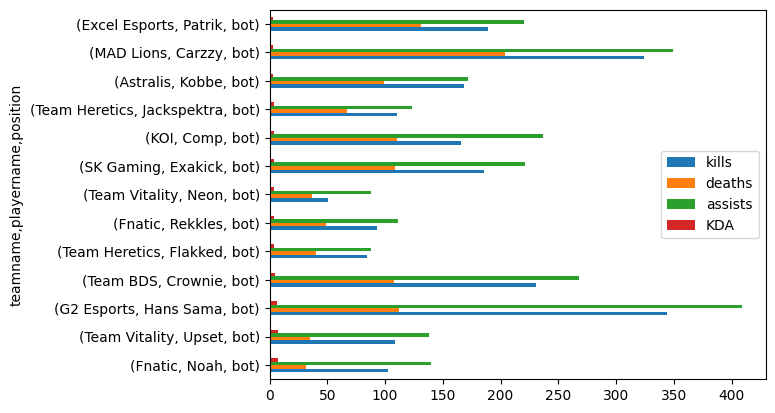

In [18]:
score.plot(kind='barh')

In [19]:
my_viz = sv.analyze(score, target_feat='champion')
my_viz.show_html()

AttributeError: 'DataFrame' object has no attribute 'iteritems'

<Axes: ylabel='teamname,playername,position'>

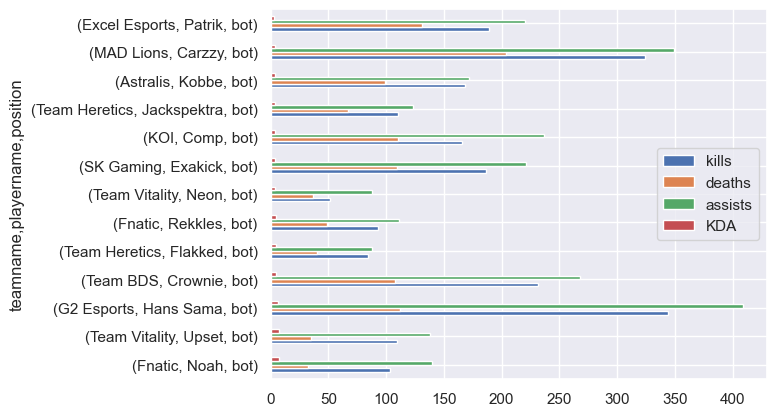

In [20]:
from seaborn import set
set()
score.plot(kind='barh')

In [21]:
df_analise2 = df_time.loc[(df_time['teamname'] == 'Excel Esports') | (df_time['teamname'] == 'Fnatic') ]
score = df_analise[['teamname', 'champion']].groupby(['champion']).count()
score

,teamname
champion,
Aphelios,59
Ashe,6
Caitlyn,16
Cassiopeia,1
Draven,20
Ezreal,22
Jhin,5
Jinx,30
Kai'Sa,25


<Axes: ylabel='champion'>

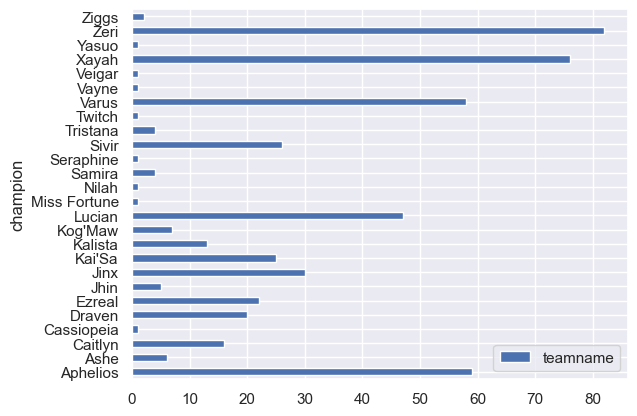

In [22]:
score.plot(kind='barh', )

In [23]:
df_time2 = pd.DataFrame(df_liga,  columns= ['date','teamname', 'position', 'side', 'result', 'firstblood', 'firstdragon', 'dragons','elders','firstherald', 'barons', 'inhibitors']).set_index('date')
df_time2 = df_time2.loc[df_time2['position'] == 'team']
df_time2[df_time2['result'] > 0] #Comando para conseguir filtrar um resultado, posso nesse caso salvar isso em outro DataFrame 
df_time2[(df_time2['result'] > 0) & (df_time2['dragons'].between(4,6))] #Posso usar esse comando para que filtre com mais de uma condição e também entre valores
#df_time2[~(df_time2['result'] > 0) & (df_time2['dragons'].between(4,6))] #Colocar o acento TIO na frente ele nega a condição

df_time2[df_time2.sum(axis=1) >=7] #traz linhas apenas onde a soma dos valores é maior que 7

df_time2[df_time2['dragons'].isin([2,4,6])] #Tras apenas linhas onde os valores de drags são o que esta dentro da lista isin


TypeError: can only concatenate str (not "int") to str

In [24]:
df_analise3 = df_time2.loc[(df_time2['teamname'] == 'Excel Esports') | (df_time2['teamname'] == 'Fnatic') ]
score = df_analise3[['teamname', 'dragons', 'result']].groupby(['teamname','result']).sum()
score

dragons
teamname      result         
Excel Esports 0          47.0
              1          55.0
Fnatic        0          32.0
              1          72.0

<Axes: xlabel='teamname,result'>

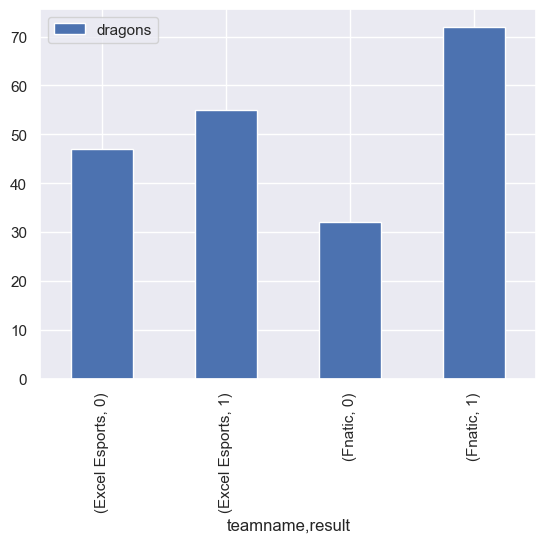

In [25]:
score.plot(kind='bar')